# Setup

In [2]:
#!pip install tensorflow
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Prepare dataset

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Train data sampling

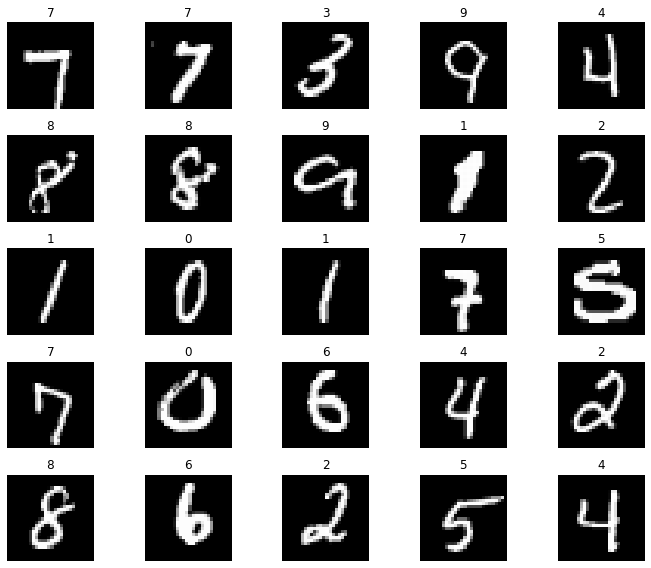

In [4]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = np.random.randint(len(x_train), size=(1,)).item()
    img = x_train[sample_idx]
    label = np.argmax(y_train[sample_idx])
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.tight_layout()    
plt.show()

# Build the model

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        #layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

# Train Model

In [6]:
batch_size = 128
#epochs = 15
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [7]:
import matplotlib.pyplot as plt
def draw(image, label):
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(f"{label}")
    plt.show()

In [8]:
import random
def show_predict():
    idx = random.randrange(0, len(x_test)-1)
    image = x_test[idx].reshape(1,28,28,1)
    predicted = model.predict(image)
    label = np.argmax(predicted)
    print("idx:", idx)
    print(predicted)
    print("label:", label)
    draw(image, label)


idx: 6573
[[0.10322075 0.08783973 0.10607243 0.09102657 0.10162348 0.10425518
  0.11960844 0.09940896 0.09671244 0.09023195]]
label: 6


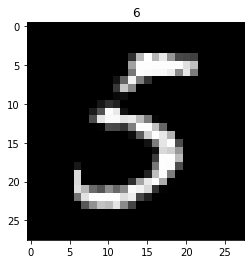

In [9]:
show_predict()

In [10]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 23s 53ms/step - loss: 0.3025 - accuracy: 0.9126 - val_loss: 0.0804 - val_accuracy: 0.9770
Epoch 2/3
422/422 [==============================] - 25s 59ms/step - loss: 0.0766 - accuracy: 0.9766 - val_loss: 0.0561 - val_accuracy: 0.9843
Epoch 3/3
422/422 [==============================] - 23s 54ms/step - loss: 0.0564 - accuracy: 0.9822 - val_loss: 0.0507 - val_accuracy: 0.9862


# Evaluate model

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.046864572912454605
Test accuracy: 0.9855999946594238


# Evaluation data 샘플링

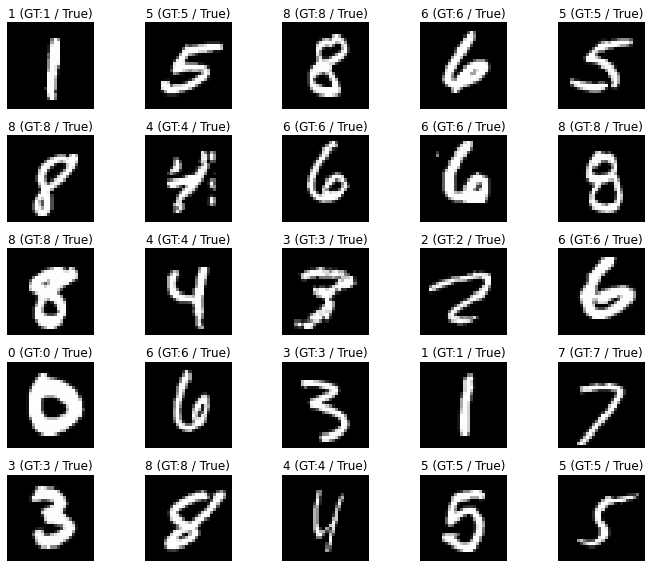

In [13]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = np.random.randint(len(x_test), size=(1,)).item()
    img = x_test[sample_idx].reshape(1,28,28,1)
    predicted = model.predict(img)
    label = np.argmax(predicted)
    gt = np.argmax(y_test[sample_idx])
    figure.add_subplot(rows, cols, i)
    plt.title(f"{label} (GT:{gt} / {gt==label})")
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.tight_layout()
plt.show()

# Test

idx: 9680
[[9.9785154e-12 1.4779237e-09 1.5725982e-07 9.9997962e-01 7.3004900e-13
  5.8948848e-07 2.5465941e-13 2.5829439e-07 1.9240644e-05 1.3600555e-07]]
label: 3


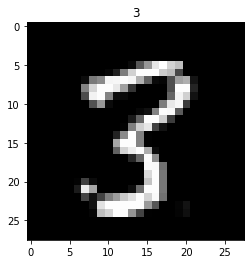

In [14]:
show_predict()